In [10]:
import pickle
import torch
from pytorch_lightning import Trainer
from pathlib import Path
from pandas import DataFrame
from caveat import models
from caveat.data import build_conditional_dataloader

import utils

In [2]:
ckpt_path = Path(
    "../logs/toy_conditional/version_17/checkpoints/epoch=0-step=29.ckpt"
)

In [9]:
# load model from checkpoint
model = models.sequence.cond_gen_lstm.CVAE_LSTM.load_from_checkpoint(ckpt_path)

# load encoders
path = ckpt_path.parent.parent / "schedule_encoder.pkl"
with open(path, "rb") as f:
    schedule_encoder = pickle.load(f)

path = ckpt_path.parent.parent / "attribute_encoder.pkl"
with open(path, "rb") as f:
    attributes_encoder = pickle.load(f)


# util function
def generate(synthetics):
    synthetic_conditionals = attributes_encoder.encode(synthetics)

    dataloader = build_conditional_dataloader(
        synthetic_conditionals, 6, max(len(synthetic_conditionals), 256)
    )

    trainer = Trainer()
    predictions = trainer.predict(
        model=model, ckpt_path=ckpt_path, dataloaders=dataloader
    )

    schedules = schedule_encoder.decode(torch.concat(predictions))
    print(f"generated {schedules.pid.nunique()} schedules")
    return schedules

Using teacher forcing ratio: 0.5
Using KLD weight: 0.00025
Using duration weight: 1.0
Using mask: True
Using weighted loss: True


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: c:\Users\ucfnfjs\Projects\caveat\demos\lightning_logs
Restoring states from the checkpoint path at ..\logs\toy_conditional\version_17\checkpoints\epoch=0-step=29.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ..\logs\toy_conditional\version_17\checkpoints\epoch=0-step=29.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

generated 5 schedules


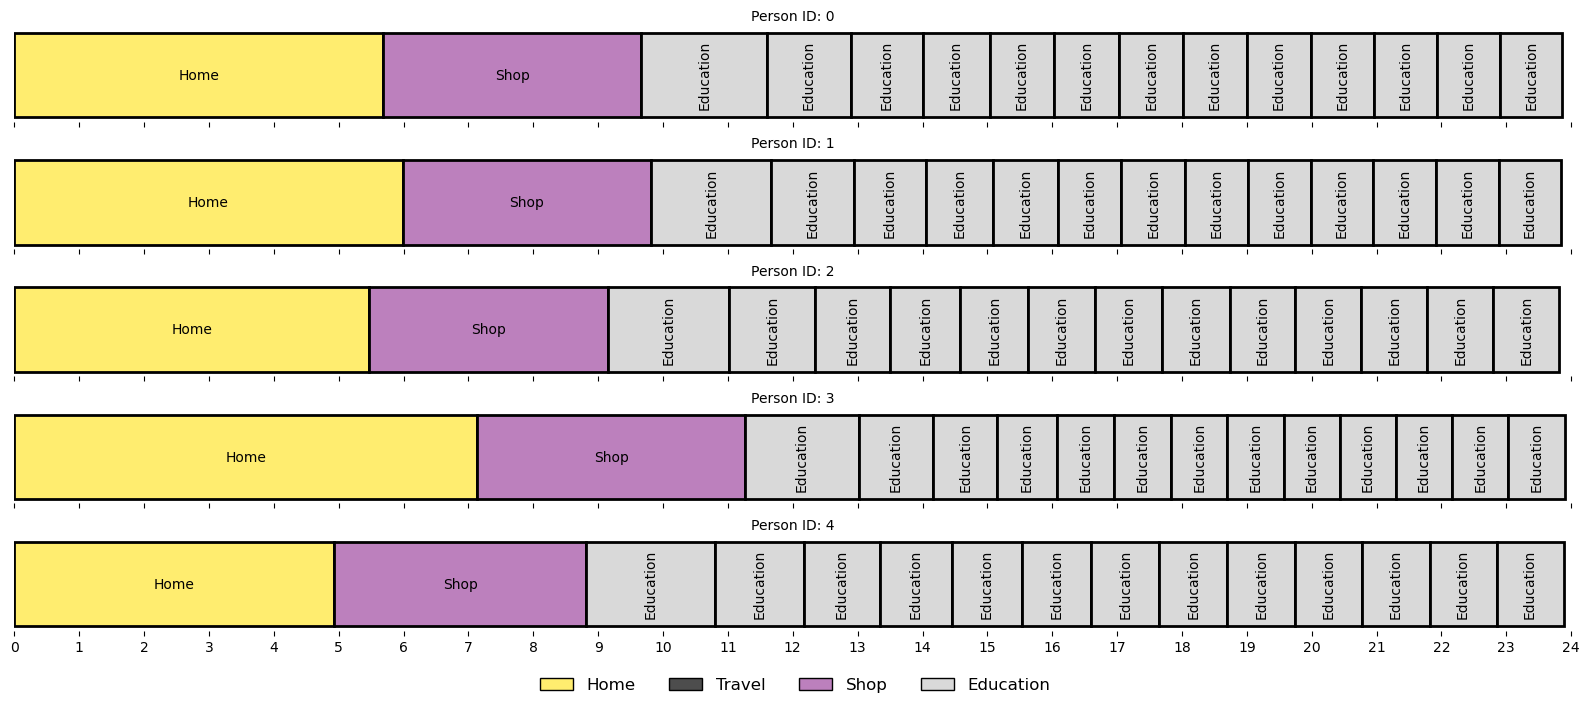

In [11]:
synthetics = DataFrame(
    [
        {"pid": 0, "gender": "M", "age": 40, "employment": "FTW"},
        {"pid": 1, "gender": "M", "age": 40, "employment": "FTW"},
        {"pid": 2, "gender": "M", "age": 40, "employment": "FTW"},
        {"pid": 3, "gender": "M", "age": 40, "employment": "FTW"},
        {"pid": 4, "gender": "M", "age": 40, "employment": "FTW"},
    ]
)

utils.plot(generate(synthetics))

In [5]:
synthetics = DataFrame(
    [
        {"pid": i, "gender": "F", "age": 20, "employment": "FTW"}
        for i in range(10_000)
    ]
)

population = generate(synthetics)
print("Done")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at ..\logs\toy_conditional\version_17\checkpoints\epoch=0-step=29.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ..\logs\toy_conditional\version_17\checkpoints\epoch=0-step=29.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

generated 10000 schedules
Done


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at ..\logs\toy_conditional\version_17\checkpoints\epoch=0-step=29.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ..\logs\toy_conditional\version_17\checkpoints\epoch=0-step=29.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

generated 5 schedules


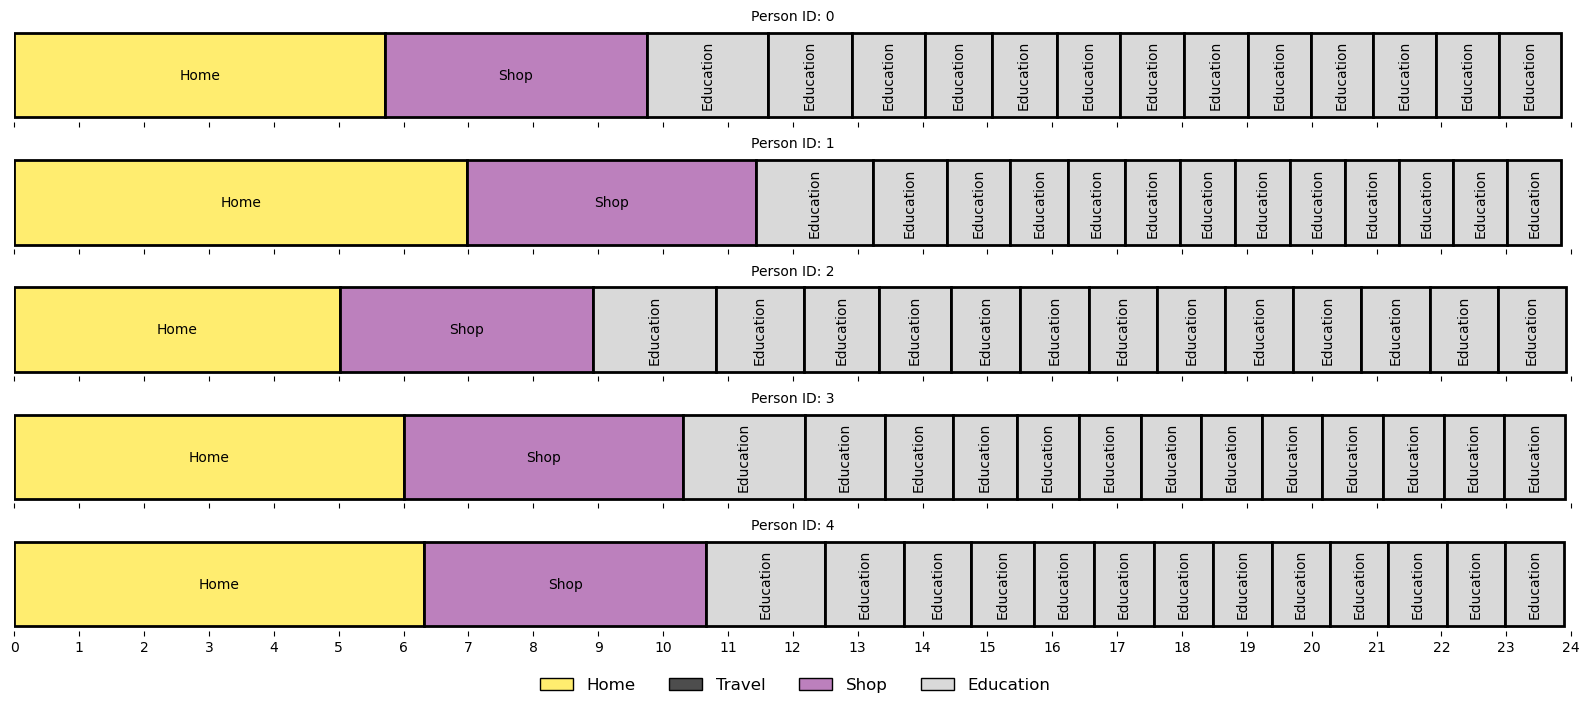

In [12]:
synthetics = DataFrame(
    [
        {"pid": 0, "gender": "F", "age": 20, "employment": "FTW"},
        {"pid": 1, "gender": "F", "age": 30, "employment": "FTW"},
        {"pid": 2, "gender": "F", "age": 40, "employment": "FTW"},
        {"pid": 3, "gender": "F", "age": 50, "employment": "FTW"},
        {"pid": 4, "gender": "F", "age": 60, "employment": "FTW"},
    ]
)

utils.plot(generate(synthetics))